<a href="https://colab.research.google.com/github/abhi-11nav/AirPassengerData-TimeSeriesForecasting/blob/main/Flight_Sale_foreocast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries 

import pandas as pd
import numpy as np 

In [2]:
!git clone https://github.com/abhi-11nav/AirPassengerData-TimeSeriesForecasting.git

Cloning into 'AirPassengerData-TimeSeriesForecasting'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 2), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [3]:
# Reading the data 

data = pd.read_csv("/content/AirPassengerData-TimeSeriesForecasting/AirPassengers.csv")

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# Changing the date column to type datecolumn

data["Month"] = pd.to_datetime(data["Month"])

In [6]:
# Renaming the columns names

data.rename(columns={'Month':'Date','#Passengers':'Passengers'},inplace=True)

In [7]:
data.set_index('Date',inplace=True)

In [8]:
data.tail()

,Passengers
Date,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [9]:
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data.columns

Index(['Passengers'], dtype='object')

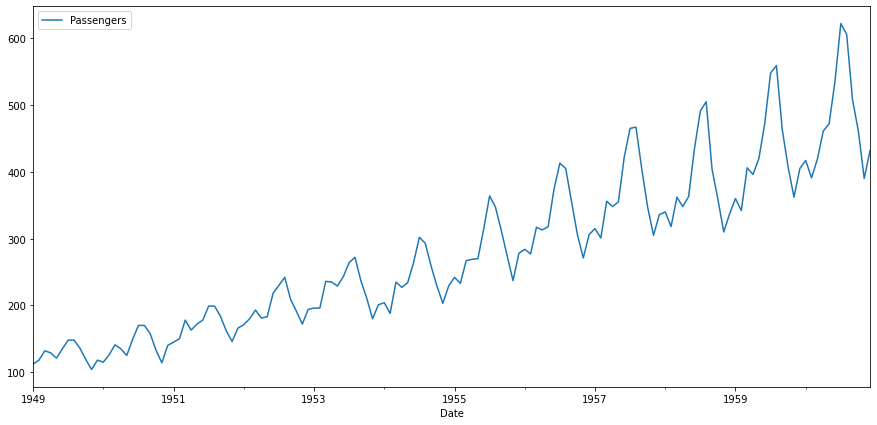

In [11]:
data.plot(figsize=(15,7))

In [12]:
# Testing if the data is stationary 

from statsmodels.tsa.stattools import adfuller

In [17]:
"""
Dickey puller test to check for stationary of data

H0 (null hypothesis) : Data is stationary.
h1 (Alternate hypothesis) : Data is non-stationary. 
"""

test_result = adfuller(data['Passengers'])

if test_result[1]<=0.05:
  print("No strong evidence against null hypothesis || Data is stationary. P-value: ",test_result[1])
else:
  print("Strong evidence against null hypothesis || Data is non-stationary. P-value: ",test_result[1])

Strong evidence against null hypothesis || Data is non-stationary. P-value:  0.991880243437641


In [18]:
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [20]:
data['Passsenger_shift'] = data['Passengers'] - data['Passengers'].shift(12)

In [24]:
# Applying dickey puller test again to re check stationary property of the data

test_result_2 = adfuller(data['Passsenger_shift'].dropna())


if test_result_2[1]<=0.05:
  print("No strong evidence against null hypothesis || Data is stationary. P-value: ",test_result_2[1])
else:
  print("Strong evidence against null hypothesis || Data is non-stationary. P-value: ",test_result_2[1])

No strong evidence against null hypothesis || Data is stationary. P-value:  0.011551493085514952


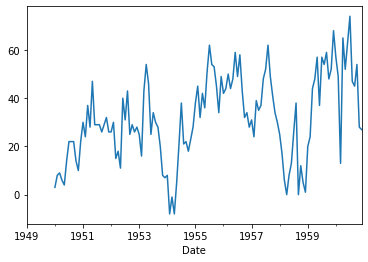

In [25]:
# Plotting the stationary data

data['Passsenger_shift'].plot()

# PCF

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline

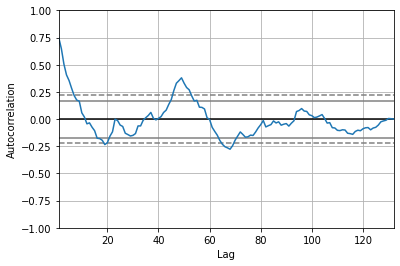

In [42]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(data['Passsenger_shift'].dropna())
plt.show()


In [45]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

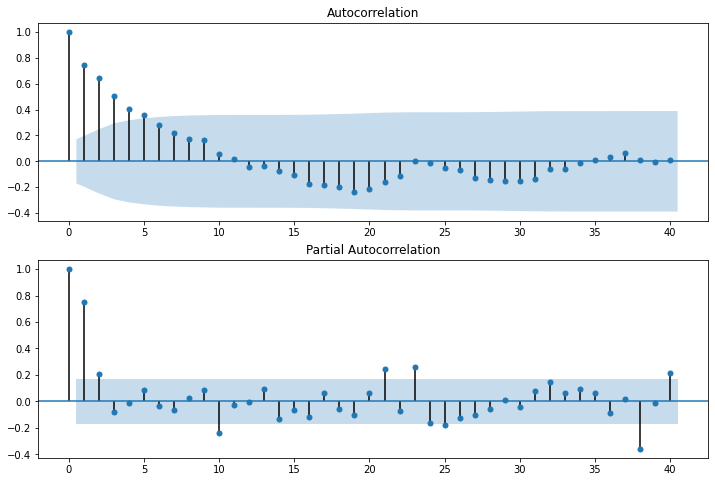

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(data['Passsenger_shift'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(data['Passsenger_shift'].dropna(),lags=40,ax=ax2)

In [57]:
# p=2, d=1, q=11, 

from statsmodels.tsa.arima_model import ARIMA

In [62]:
model = ARIMA(data['Passsenger_shift'].dropna(),order=(2,1,11))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [65]:
model_fit = model.fit((2,11))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:684: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


ValueError: ignored